In [1]:
# All required libraries and functions  are imported in this cell
from __future__ import division     # Enable floating point division i.e. 3/4=0.75 insted of 0
from IPython.utils import io        # Suppress undesired print commands  
import os as os                     # Operating system funcitons for navigation pursposes
import numpy as np                  # Numerical Library for matrix operations
import matplotlib.pyplot as plt     # Plotting Library 
import scipy.optimize as spo
import scipy.io as sio
import warnings as iw
from sklearn import svm
from operator import itemgetter

%matplotlib inline
#%config InlineBackend.figure_format = 'retina'  # Sharp plots  
iw.filterwarnings(action='ignore')

%matplotlib inline  

data_dir="C:/GitHub/ML_Coursera/ex6/data/"

## A: Supporting functions

In [2]:
# Plot +ve and -ve examples
def plotData(X, y, fig_dt):      # Configured plot +ve and -ve examples
    pos, neg = data_sort(y)      # Sort +ve and -ve examples
    plt.figure(figsize=fig_dt['figspan'])
    
    plt.plot(X[:,0][pos], X[:,1][pos], fig_dt['mk'][0], ms=fig_dt['ms'][0],mec=fig_dt['mec'][0],lw=fig_dt['lw'][0], \
             label=fig_dt['label'][0],mew=fig_dt['mew'][0])
    plt.plot(X[:,0][neg], X[:,1][neg], fig_dt['mk'][1], ms=fig_dt['ms'][1],mec=fig_dt['mec'][1],lw=fig_dt['lw'][1], \
             label=fig_dt['label'][1],mew=fig_dt['mew'][1])
    plt.xlabel(fig_dt['xlabel'])    
    plt.ylabel(fig_dt['ylabel'])
    plt.title(fig_dt['title'], y=fig_dt['title_pos'])
    plt.axis(fig_dt['limits'])
  

    
def visualizeBoundary(X,y,svm_clf):
    x1min, x2min = min(X[:,0]) - 0.5, min(X[:,1]) - 0.5
    x1max, x2max = max(X[:,0]) + 0.5, max(X[:,1]) + 0.5
    x1vals = np.linspace(x1min,x1max,1000)
    x2vals = np.linspace(x2min,x2max,1000)
    u , v = np.meshgrid(x1vals,x2vals) 
    x_mat = np.c_[u.ravel(),v.ravel()]                          # Ravel flattens u,v
    predict_grid = svm_clf.predict(x_mat).reshape((1000,1000))    # prdict using svm and reshape the ouptput to grid 
 

    plt.contour(x1vals,x2vals, predict_grid, [0],colors=('blue'))

## B: Utility functions

In [3]:
# Return the contents of the data file
def load_data(data_dir,f_name):                       
    os.chdir(data_dir)
    data=sio.loadmat(f_name)
    return data

def data_sort(y):                  # Return list containing indices of +ve and -ve examples                         
    pos = []
    neg = []
    for i in np.arange(len(y)):
        if y[i]==1 : pos.append(i)
        else    : neg.append(i)  
    return pos,neg 

# Generate a dicitonary of plotting parameters, makes it easier to edit and and similar figures
def fig_details(limits,figspan,title_pos,marker,markersize,markeredgecolor,linewidth,markeredgewidth, \
                xlabel='',ylabel='',title='',label='',gridlines='',display_legend=''):
    fig_dt={}
    fig_dt['limits']    = limits
    fig_dt['figspan']   = figspan
    fig_dt['xlabel']    = xlabel 
    fig_dt['ylabel']    = ylabel
    fig_dt['label']     = label
    fig_dt['title']     = title
    fig_dt['title_pos'] = title_pos
    fig_dt['mk']        = marker
    fig_dt['ms']        = markersize
    fig_dt['mec']       = markeredgecolor
    fig_dt['lw']        = linewidth
    fig_dt['mew']       = markeredgewidth
    #fig_dt['legend']    = display_legend
    #fig_dt['gridlines'] = gridlines
    return fig_dt



## 1 Support Vector Machines

## 1.1 Example Dataset 1


In [4]:
# Lets load the data
data=load_data(data_dir,'ex6data1.mat')
print data.keys()    

['y', 'X', '__version__', '__header__', '__globals__']


In [5]:
X=data['X']
y=data['y']
print 'X.shape: ', X.shape,'y.shape: ', y.shape

X.shape:  (51L, 2L) y.shape:  (51L, 1L)


In [6]:
# Configure plot variables
fig_dt=fig_details(limits=[0, 4.5, 1.5, 5],figspan=(8,6),xlabel='',\
                  ylabel='', label=['positive examples','negative examples'], \
                  title='Figure 1: Example Dataset 1',\
                  title_pos=-0.15,marker=['k+','yo'],markersize=[7,7],markeredgecolor=['k','k'],\
                  linewidth=[10,10],markeredgewidth=[1,0.5])

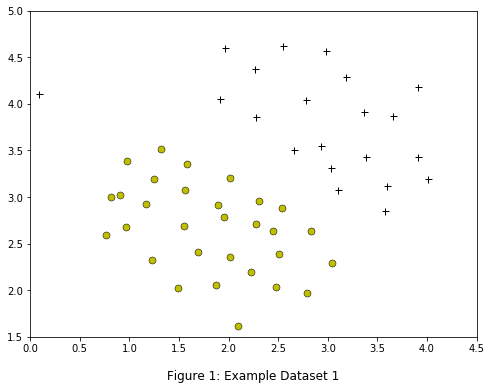

In [7]:
plotData(X,y,fig_dt)

We will use SVM classifier (class) from scikit-learn library! 
ref: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [8]:
# Lets train the classfier
svm_clf=svm.SVC(C=1.0,kernel='linear')            # create instance of SVC class
svm_clf.fit(X,y.flatten());                       # Training SVM, y.shape=(n_samples,)

In [9]:
# Predict using classifier 
print \
 'Lets evaluate SVM prediction: ',"\n", \
 'pt A [1,2]: ',  svm_clf.predict([[1,2]])[0] ," A negative example", "\n", \
 'pt B [4,4]: ',  svm_clf.predict([[4,4]])[0] ," A positive example","\n",\
 'This is what one would expect based on above Figure 1. '

Lets evaluate SVM prediction:  
pt A [1,2]:  0  A negative example 
pt B [4,4]:  1  A positive example 
This is what one would expect based on above Figure 1. 


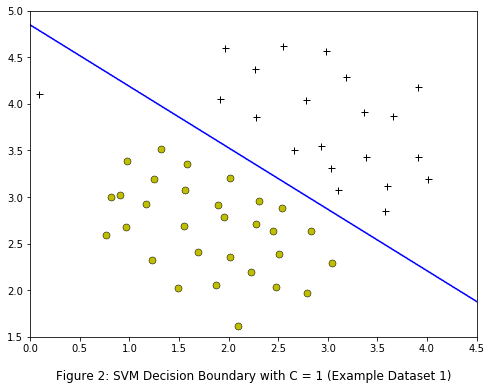

In [10]:
# Lets figure out how to plot a decision boundary
# 1. Generate a grid of x1, x2 values.
# 2. Use svm_clf to prdict on grid points.
# 3. Plot a contour 

fig_dt['title']='Figure 2: SVM Decision Boundary with C = 1 (Example Dataset 1)'
plotData(X,y,fig_dt)
visualizeBoundary(X,y,svm_clf)

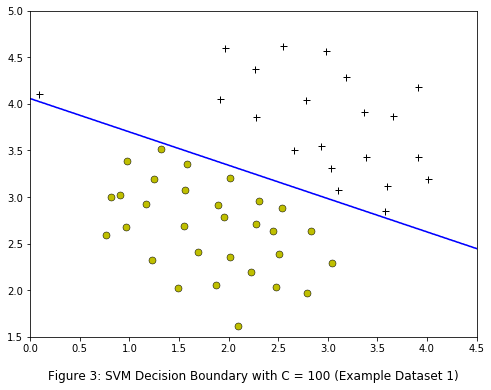

In [11]:
# Lets train SVM using C=100
svm_clf100=svm.SVC(C=100.0,kernel='linear')               # create instance of SVC class
svm_clf100.fit(X,y.flatten())                             # Training SVM

fig_dt['title']='Figure 3: SVM Decision Boundary with C = 100 (Example Dataset 1)'
plotData(X,y,fig_dt)
visualizeBoundary(X,y,svm_clf100)

## 1.2 SVM with Gaussian Kernels

### 1.2.1 Gaussian Kernel

In [12]:
def Gauss_k(x1,x2,sigma):
    delx=x1-x2
    return np.exp(-np.matmul(delx.T,delx)/(2*sigma**2))

print  \
'The value for x1 = [1 2 1] and x2 = [0 4 -1] with sigma = 2 is: ',\
round(Gauss_k(np.array([1, 2, 1]), np.array([0, 4, -1]),2),6)

The value for x1 = [1 2 1] and x2 = [0 4 -1] with sigma = 2 is:  0.324652


### 1.2.2 Example Dataset 2

In [13]:
data = sio.loadmat('ex6data2.mat')
print data.keys()

['y', 'X', '__version__', '__header__', '__globals__']


In [14]:
X, y = data['X'], data['y']
print 'X.shape: ', X.shape,'y.shape: ', y.shape

X.shape:  (863L, 2L) y.shape:  (863L, 1L)


In [15]:
fig_dt['limits'] = [0,1,0.4,1]
fig_dt['title']  = 'Figure 4: Example Dataset 2'

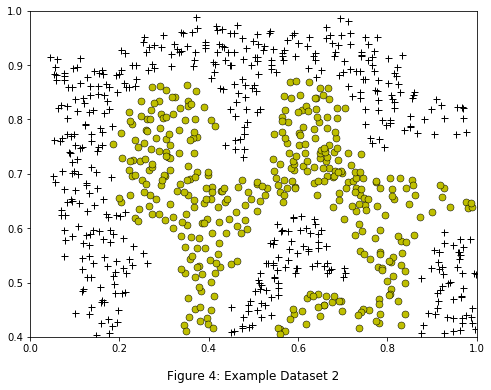

In [16]:
plotData(X,y,fig_dt)

Lets train the SVM uisng Gaussian (Radial bias function 'rbf') Kernel on the Dataset 2


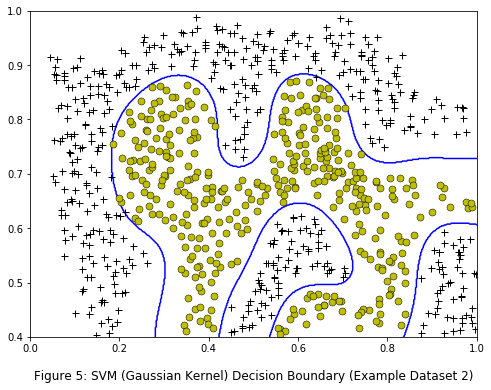

In [17]:
# Specify parameters for SVM
sigma = 0.1
gamma = sigma**-2     # Remember - sign

# Create SVM class and train the model
svm_gauss=svm.SVC(C=1, kernel='rbf', gamma=gamma)
svm_gauss.fit(X, y.flatten())

#Configure plot variable
fig_dt['title']='Figure 5: SVM (Gaussian Kernel) Decision Boundary (Example Dataset 2)'

# Lets plot the model
plotData(X,y,fig_dt)
visualizeBoundary(X,y,svm_gauss)

I used higher number of grid points for generating the decision boundary. As a result the curve appears to be much smoother. I did it in order to clarify the smoothness of decision boundary is a result points on grid and is not related to the classifier.

# 1.2.3 Example Data set 3

In [18]:
data = sio.loadmat('ex6data3.mat')
print data.keys()

['yval', '__header__', '__globals__', 'Xval', 'y', 'X', '__version__']


In [19]:
X, y     = data['X'],  data['y']
Xval, yval = data['Xval'],  data['yval']
print 'X.shape: ', X.shape,'y.shape: ', y.shape
print 'Xval.shape: ', Xval.shape,'yval.shape: ', yval.shape

X.shape:  (211L, 2L) y.shape:  (211L, 1L)
Xval.shape:  (200L, 2L) yval.shape:  (200L, 1L)


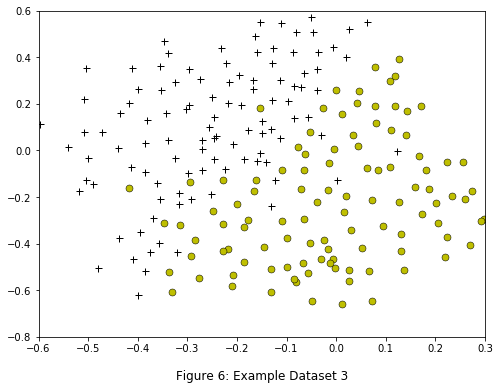

In [20]:
# Configure plot variables
fig_dt['limits'] = [-0.6,0.3,-0.8,0.6]
fig_dt['title']  = 'Figure 6: Example Dataset 3'

# Lets plot the data
plotData(X,y,fig_dt)

In [21]:
Cs=[0.01,0.03,0.1,0.3,1,3,10,30]
sigmas=Cs
score_g=[]
for i in range(len(Cs)):
    for j in range(len(sigmas)):
        gamma=sigmas[j]**-2
        svm_gauss = svm.SVC(C=Cs[i],kernel='rbf',gamma=gamma)               # create instance of SVC class
        svm_gauss.fit(X,y.flatten())                                       # y.shape=(n_samples,)
        score=svm_gauss.score(Xval,yval)
        score_g.append([score, Cs[i], sigmas[j]])
sl=sorted(score_g, key=itemgetter(0),reverse=True)[0]
print sl        

[0.96499999999999997, 0.3, 0.1]


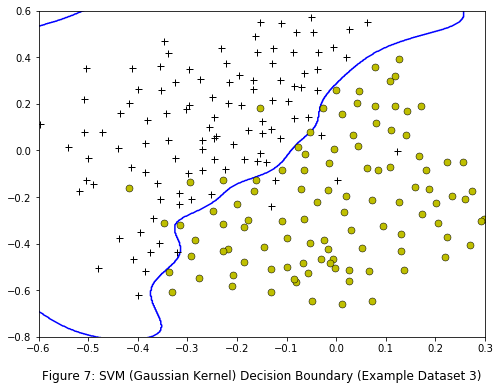

In [22]:
svm_gauss = svm.SVC(C=0.3,kernel='rbf',gamma=100)               # create instance of SVC class
svm_gauss.fit(X,y.flatten())                                    # y.shape=(n_samples,)

fig_dt['title'] = 'Figure 7: SVM (Gaussian Kernel) Decision Boundary (Example Dataset 3)'
plotData(X,y,fig_dt)
visualizeBoundary(X,y,svm_gauss)

## 2 Spam Classification

## 2.1 Preprocessing Emails

We are given the vectorized version of emails based on its word content. 
What does this mean, how do we arrive to vectorized form ?  

Step1: Export email (html code) to text file  
Step2: Change all text to lower case  
Step3: Strip html code from actual text  

Work around uniqueness of URL's, email adresses, numbers  
Step4: Replace URL's with an identifier 'httpaddr'  
Step5: Replace email address  with an identifier 'emailaddr'  
Step6: Replace numbers (in text body) with an indentifier 'number'  

This is an engineered feauture where lot of emails containing $ sign are spam  
Step7: Replace dollar sign with an identifier 'dollar'  


Word Stemming  
Step8: Group similar spelt words and assign an identifer  
eg: include, indcluding, included by 'includ'  


Step9: Remove non-words i.e punctuation and special characters, remeber dollar would not get filtered because we have replaced the $ sign with word dollar.  


***

Having done this we are left with only words, now we can sort them a-z (arbitrary) and asingn key to every word  which is an index in the sorted list.
We wil call this as vocab list.  

## 2.2 Extracting Features from Emails


A typical email will have some of the words from vocab. So we will the contruct a vector have length of vocab list. replace entries by 1 corresponding to index of the words present in the email. The index is based the vocab list.  


***

We have vectorized our email!  

In [23]:
data=load_data(data_dir,'spamTrain.mat')
data.keys()

['y', 'X', '__version__', '__header__', '__globals__']

In [24]:
X, y = data['X'], data['y']
print 'X.shape: ', X.shape,'y.shape: ', y.shape

X.shape:  (4000L, 1899L) y.shape:  (4000L, 1L)


In [25]:
y=y.flatten()
m=y.shape[0]
print m

4000


## 2.3 Training SVM for Spam Classification

In [26]:
svm_spam=svm.SVC(C=1, kernel='linear')              # Create instance
svm_spam.fit(X,y.flatten());                        # Train the model

## 2.4 Top Predictors for Spam (Linear kernel)

#### Compute Accuracy of model on training set

In [27]:
p=svm_spam.predict(X)

pct_Accuracy=(1-np.mean((p-y)**2))*100
print 'Spam Email Problem:', '\n', \
      'Training Accuracy: %0.3f%%'%pct_Accuracy, '\n',\
      'Expected Accuracy: 99.98%'

Spam Email Problem: 
Training Accuracy: 99.975% 
Expected Accuracy: 99.98%


#### Compute Accuracy of model on Test set

In [28]:
# Load Data
data_test=load_data(data_dir,'spamTest.mat')
data_test.keys()

['ytest', 'Xtest', '__version__', '__header__', '__globals__']

In [29]:
Xval=data_test['Xtest']
yval=data_test['ytest']

yval=yval.flatten()
mtest=yval.shape[0]

In [30]:
pt=svm_spam.predict(Xval)

pct_Accuracy=(1-np.mean((pt-yval)**2))*100
print 'Spam Email Problem:', '\n', \
      'Test Set Accuracy: %0.3f%%'%pct_Accuracy, '\n',\
      'Expected Accuracy: 98.5%'

Spam Email Problem: 
Test Set Accuracy: 97.800% 
Expected Accuracy: 98.5%


## 2.4 Top Predictors for Spam (Gaussian kernel)

In [31]:
svm_spam=svm.SVC(C=1, kernel='rbf', gamma=100)              # Create instance
svm_spam.fit(X,y.flatten());                        # Train the model

p=svm_spam.predict(X)

pct_Accuracy=(1-np.mean((p-y)**2))*100
print 'Spam Email Problem:', '\n', \
      'Training Accuracy: %0.3f%%'%pct_Accuracy, '\n',\
      'Expected Accuracy: 99.98%'
        
pt=svm_spam.predict(Xval)

pct_Accuracy=(1-np.mean((pt-yval)**2))*100
print 'Spam Email Problem:', '\n', \
      'Test Set Accuracy: %0.3f%%'%pct_Accuracy, '\n',\
      'Expected Accuracy: 98.5%'

Spam Email Problem: 
Training Accuracy: 100.000% 
Expected Accuracy: 99.98%
Spam Email Problem: 
Test Set Accuracy: 79.800% 
Expected Accuracy: 98.5%


Overfitting at its Finest!!!!!!